# Comparison of  the expectation of the directional derivative of the input-output map $\mathbb{E}[|| \mathbf{J}_{\mathcal{N}} (\mathbf{x}) \mathbf{u} ||^2]$ for width-2 maxout and ReLU networks

 - It takes several minutes to compute the figures.

 - In the paper we used maxout networks of depths $L = 2, 4, 6, 11$ and ReLU networks pf depth $L = 6$.
The number of hidden layers then equals $L-1$.

 - To obtain the same images as in the paper set **weight_samples** and **num_steps** to the values specified in the figure description.

In [1]:
from datetime import datetime
from matplotlib import ticker
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter

%matplotlib inline

## Maxout network





In [2]:
np.random.seed(80519)

L = 4 # Network depth
weight_samples = 100 # Number of initializations of the network used to estimate the expectation
num_steps = 50 # Total number of points in the input grid is num_steps x num_steps

K = 5
WIDTH = 2

x_list = np.linspace(-1000, 1000, num_steps)
y_list = np.linspace(-1000, 1000, num_steps)

second_moments_maxout = np.asarray([[0. for _ in range(num_steps)] for _ in range(num_steps)])

u = np.random.normal(loc=0., scale=1, size=WIDTH)
u = u / np.linalg.norm(u)

for xi, x in enumerate(x_list):
    for yi, y in enumerate(y_list):
        input_x = np.asarray([x, y])
    
        jx_array = []    
        for _ in range(weight_samples):            
            x0 = input_x
            run_weights = []
            for _ in range(L - 1):
                weights = np.random.normal(loc=0., scale=1., size=[WIDTH, K, WIDTH])
                biases = np.random.normal(loc=0., scale=1., size=[WIDTH, K])
                argmax = np.argmax(np.dot(weights, x0) + biases, axis=-1)
                x0 = np.max(np.dot(weights, x0) + biases, axis=-1)
                chosen_weights = [w[a] for w,a in zip(weights, argmax)]
                run_weights.append(np.asarray(chosen_weights))
            
            # Last linear layer
            weights = np.random.normal(loc=0., scale=1., size=[WIDTH, WIDTH])
            run_weights.append(np.asarray(weights))

            # Multiply the weights chosen based on the maxout to obtain the Jacobian
            res = run_weights[-1]
            for w in reversed(run_weights[:-1]):
                res = np.dot(res, w)
            
            # Append the squared norm of the directional derivative of the input-output map
            jx_array.append(np.dot(res, u)**2)    
            
        second_moments_maxout[xi][yi] = np.mean(jx_array)

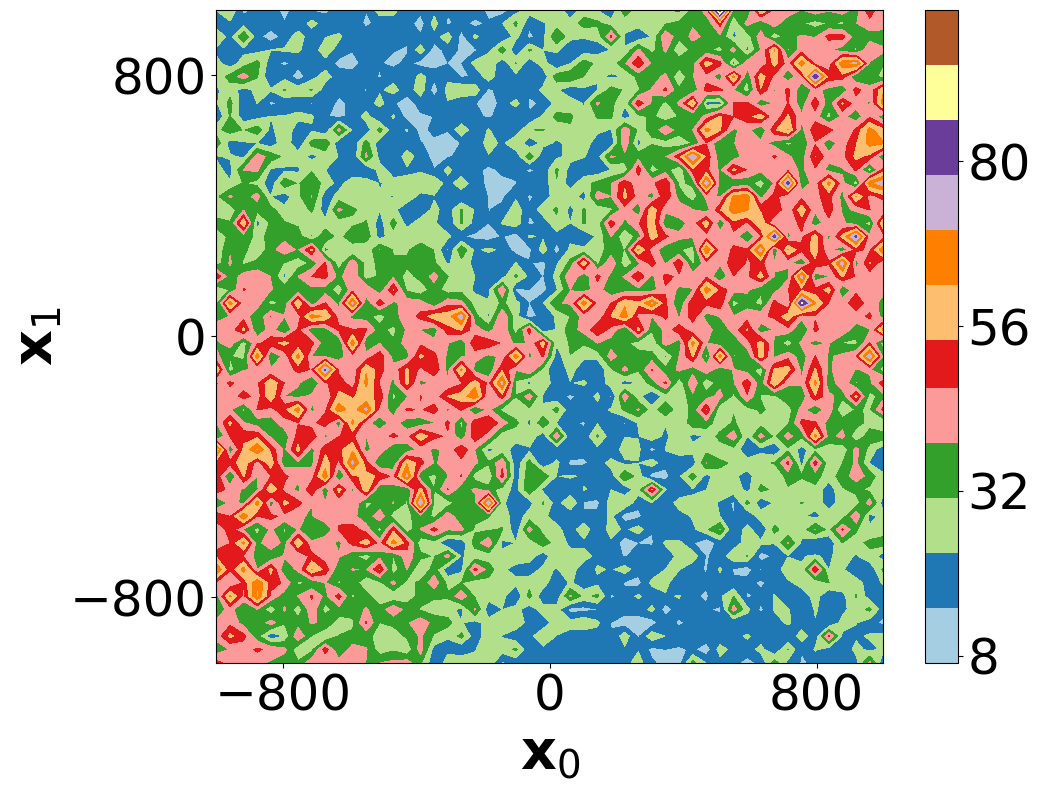

In [3]:
# Plot the results
fig = plt.figure(figsize=(10.7, 8), dpi=100)
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)

plt.xlabel("$\mathbf{x}_0$", size=40)
plt.ylabel("$\mathbf{x}_1$", size=40)
plt.margins(x=0)

plt.xticks([-800, 0, 800])
plt.yticks([-800, 0, 800])

cp = ax.contourf(x_list, y_list, second_moments_maxout, cmap='Paired', levels=100)
ticks = [round(np.min(second_moments_maxout), 0)
         + i * round((np.max(second_moments_maxout) - np.min(second_moments_maxout)) / 4, 0)
         for i in range(5)]
cbar = fig.colorbar(cp, ticks=ticks)
cbar.ax.tick_params(labelsize=36)
plt.tight_layout()

# ReLU

In [4]:
np.random.seed(80519)

L = 6 # Network depth
weight_samples = 100 # Number of initializations of the network used to estimate the expectation
num_steps = 50 # Total number of points in the input grid is num_steps x num_steps

K = 5
WIDTH = 2

x_list = np.linspace(-1000, 1000, num_steps)
y_list = np.linspace(-1000, 1000, num_steps)

second_moments_relu = np.asarray([[0. for _ in range(num_steps)] for _ in range(num_steps)])
u = np.random.normal(loc=0., scale=1, size=WIDTH)
u = u / np.linalg.norm(u)

for xi, x in enumerate(x_list):
    for yi, y in enumerate(y_list):
        input_x = np.asarray([x, y])
        jx_array = []   
        
        for _ in range(weight_samples):            
            x0 = input_x
            run_weights = []
            for _ in range(L - 1):
                weights = np.random.normal(loc=0., scale=1., size=[WIDTH, WIDTH])
                biases = np.random.normal(loc=0., scale=1., size=[WIDTH])
                chosen_weights = [w if np.dot(w, x0) + b > 0 else np.zeros(WIDTH)
                                  for w, b in zip(weights, biases)]
                run_weights.append(np.asarray(chosen_weights))
                
                x0 = [np.dot(w, x0) + b if np.dot(w, x0) + b > 0 else 0
                                  for w, b in zip(weights, biases)]
            
            # Last linear layer
            weights = np.random.normal(loc=0., scale=1., size=[WIDTH, WIDTH])
            run_weights.append(np.asarray(weights))

            # Multiply the weights chosen based on the ReLU to obtain the Jacobian
            res = run_weights[-1]
            for w in reversed(run_weights[:-1]):
                res = np.dot(res, w)
            
            # Append the squared norm of the directional derivative of the input-output map
            jx_array.append(np.dot(res, u)**2)    
            
        second_moments_relu[xi][yi] = np.mean(jx_array)

In [ ]:
# Plot the results
fig = plt.figure(figsize=(10.7, 8), dpi=100)
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)

plt.xlabel("$\mathbf{x}_0$", size=40)
plt.ylabel("$\mathbf{x}_1$", size=40)
plt.margins(x=0)

plt.xticks([-800, 0, 800])
plt.yticks([-800, 0, 800])

cp = ax.contourf(x_list, y_list, second_moments_relu, cmap='Paired', levels=100)
ticks = [round(np.min(second_moments_relu), 0)
         + i * round((np.max(second_moments_relu) - np.min(second_moments_relu)) / 4, 0)
         for i in range(5)]
cbar = fig.colorbar(cp, ticks=ticks)
cbar.ax.tick_params(labelsize=36)
plt.tight_layout()